In [74]:
from Neural_models import *

In [75]:
import importlib
import Neural_models
importlib.reload(Neural_models)

<module 'Neural_models' from 'D:\\Documents\\_GitLab\\procesado_futbol\\Neural_models.py'>

In [76]:
import keras

In [77]:
ventanas_validacion = pd.read_parquet('ventanas_validacion.parquet')
ventanas_test = pd.read_parquet('ventanas_test.parquet')
ventanas_train = pd.read_parquet('ventanas_train.parquet')


In [78]:
# ventanas_train['EsEvento'] = ventanas_train['percentage_evt'].gt(float(30))
# ventanas_train['EsEvento'] = ventanas_train['EsEvento'].replace({True: 1, False: 0})
# ventanas_train['EventoCerca'] = ventanas_train['percentage_evt'].gt(float(0))&ventanas_train['percentage_evt'].le(float(30))
# ventanas_train['EventoCerca'] = ventanas_train['EventoCerca'].replace({True: 1, False: 0})
# ventanas_train['NoEvento'] = ventanas_train['percentage_evt'].eq(float(0))
# ventanas_train['NoEvento'] = ventanas_train['NoEvento'].replace({True: 1, False: 0})
ventanas_train

gyro_y_l_0  gyro_z_l_0  acc_z_l_0  gyro_y_r_0  gyro_z_r_0   acc_z_r_0  \
0        0.503000   -1.800000  -0.100000    1.002607   -1.500000   -0.400000   
1        1.002016   -1.800000   0.700000    1.003681   -2.000000   -0.400000   
2        1.008985   -1.800000   0.800000    1.005960   -2.300000   -0.400000   
3        1.006203   -1.800000   0.600000    1.006937   -2.400000   -0.400000   
4        1.008269   -1.400000   0.700000    1.004452   -2.300000   -0.300000   
...           ...         ...        ...         ...         ...         ...   
26727    2.105446  279.500000  -8.400000    1.009071  -18.799999   -0.400000   
26728    2.016429 -320.799988 -50.799999    2.233631 -553.700012  242.500000   
26729    1.083694  -15.400000   0.000000    0.790341  262.600006  -46.599998   
26730    1.018136  -17.200001   1.200000    2.627784  253.899994   91.000000   
26731    1.033205  -20.200001   6.300000    1.366696   -9.800000  -59.799999   

       gyro_y_l_1  gyro_z_l_1  acc_z_l_1  gyro_y_r_1  ...  gyro_y_l_29  \
0        0.756500  -21.600000   2.600000    1.002607  ...     1.007727   
1        1.005508   -1.700000   0.900000    1.003681  ...     1.009589   
2        1.009492   -1.800000   0.800000    1.005960  ...     1.007572   
3        1.008601   -2.000000   0.700000    1.008234  ...     1.007650   
4        1.005634   -1.400000   0.600000    1.006863  ...     1.012448   
...           ...         ...        ...         ...  ...          ...   
26727    2.039723  228.199997  28.700001    1.009071  ...     1.226600   
26728    2.298214 -186.399994 -25.200001    2.233631  ...     3.058900   
26729    1.076347  -13.700000   0.000000    1.791542  ...     0.739920   
26730    1.022568  -18.200001   1.000000    2.627784  ...     1.427358   
26731    1.029603  -23.400000   8.900000    1.451962  ...     4.461131   

       gyro_z_l_29  acc_z_l_29  gyro_y_r_29  gyro_z_r_29  acc_z_r_29  \
0        -1.300000    0.700000     1.005966         -2.0        -0.4   
1        -2.100000    0.500000     1.009543         -2.1        -0.2   
2        -2.200000    0.300000     1.004321         -1.9        -0.2   
3        -2.100000    0.000000     1.004751         -1.9        -0.3   
4        -2.000000    0.000000     1.007593         -2.1        -0.2   
...            ...         ...          ...          ...         ...   
26727  -101.300003   19.600000     1.194810        -10.5        -4.9   
26728  -502.200012  121.300003     1.194810        -10.5        -4.9   
26729   161.800003  -41.900002     1.002694        -11.4        -1.2   
26730   359.799988  -80.300003     1.004918        -18.0        -1.1   
26731   253.899994   11.500000     1.130139        -33.5        -4.1   

       percentage_evt  EsEvento  EventoCerca  NoEvento  
0                 0.0         0            0         1  
1                 0.0         0            0         1  
2                 0.0         0            0         1  
3                 0.0         0            0         1  
4                 0.0         0            0         1  
...               ...       ...          ...       ...  
26727             0.0         0            0         1  
26728             0.0         0            0         1  
26729             0.0         0            0         1  
26730             0.0         0            0         1  
26731             0.0         0            0         1  

[26732 rows x 184 columns]

In [79]:
# split into input (X) and output (y) variables
X_train = np.asarray(ventanas_train)[:, :-4]
y_train = np.asarray(ventanas_train)[:, -3:]
y_train_num = np.array([np.where(y_row == 1)[0] for y_row in y_train])

X_val = np.asarray(ventanas_validacion)[:, :-4]
y_val = np.asarray(ventanas_validacion)[:, -3:]
y_val_num = np.array([np.where(y_row == 1)[0] for y_row in y_val])

X_test = np.asarray(ventanas_test)[:, :-4]
y_test = np.asarray(ventanas_test)[:, -3:]
y_test_num = np.array([np.where(y_row == 1)[0] for y_row in y_test])


In [127]:

num_unos_train = ventanas_train.loc[y_train[:,0] == 1,'EsEvento'].shape[0]
num_unos_val = ventanas_validacion.loc[y_val[:,0] == 1,'EsEvento'].shape[0]
num_unos_test = ventanas_test.loc[y_test[:,0] == 1,'EsEvento'].shape[0]
print(f'Número total de casos con evento          ={num_unos_train+num_unos_val+num_unos_test}    train={num_unos_train}  val={num_unos_val}  test={num_unos_test}')
num_unos_train = ventanas_train.loc[y_train[:,1] == 1,'EventoCerca'].shape[0]
num_unos_val = ventanas_validacion.loc[y_val[:,1] == 1,'EventoCerca'].shape[0]
num_unos_test = ventanas_test.loc[y_test[:,1] == 1,'EventoCerca'].shape[0]
print(f'Número total de casos con evento cercano  ={num_unos_train+num_unos_val+num_unos_test}     train={num_unos_train}   val={num_unos_val}   test={num_unos_test}')
num_unos_train = ventanas_train.loc[y_train[:,2] == 1,'NoEvento'].shape[0]
num_unos_val = ventanas_validacion.loc[y_val[:,2] == 1,'NoEvento'].shape[0]
num_unos_test = ventanas_test.loc[y_test[:,2] == 1,'NoEvento'].shape[0]
print(f'Número total de casos NO evento           ={num_unos_train+num_unos_val+num_unos_test}   train={num_unos_train} val={num_unos_val} test={num_unos_test}')

Número total de casos con evento          =2154    train=1587  val=329  test=238
Número total de casos con evento cercano  =492     train=356   val=73   test=63
Número total de casos NO evento           =33545   train=24789 val=5177 test=3579


In [80]:

print(f'Dimensions of X_train={np.shape(X_train)}; y_train={np.shape(y_train)}; y_train_num={np.shape(y_train_num)}')
print(f'Dimensions of X_val={np.shape(X_val)}; y_val={np.shape(y_val)}; y_val_num={np.shape(y_val_num)}')
print(f'Dimensions of X_test={np.shape(X_test)}; y_test={np.shape(y_test)}; y_test_num={np.shape(y_test_num)}')

Dimensions of X_train=(26732, 180); y_train=(26732, 3); y_train_num=(26732, 1)
Dimensions of X_val=(5579, 180); y_val=(5579, 3); y_val_num=(5579, 1)
Dimensions of X_test=(3880, 180); y_test=(3880, 3); y_test_num=(3880, 1)


In [81]:
"""**Construyendo el modelo**"""

# CONSTRUYENDO EL MODELO
# define the keras model
batch_size = 512

def create_model(input_dim, hidden_num, output_num):
    w_initializer = keras.initializers.HeNormal()
    b_initializer = keras.initializers.RandomUniform(minval=-0.5, maxval=+0.5)

    inputs = keras.Input(shape=(input_dim,))
    x = keras.layers.BatchNormalization()(inputs)
    x = keras.layers.Dense(hidden_num, input_dim=input_dim, activation='relu', bias_initializer=b_initializer,
                           kernel_initializer=w_initializer)(x)
    x = keras.layers.BatchNormalization()(x)
    outputs = keras.layers.Dense(output_num, bias_initializer=b_initializer, kernel_initializer=w_initializer,
                                 activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="MLP_futbol")

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


In [82]:
import matplotlib.pyplot as plt
import sys

# plot diagnostic learning curves
def summarize_diagnostics(history, projectPath, index):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    # plt.show()
    # save plot to file
    filename = projectPath + sys.argv[0].split('/')[-1]
    print('Saving figure: ' + filename)
    # plt.savefig(filename + str(index) + '_plot.png')
    plt.savefig(projectPath + str(index) + '_plot.png')
    plt.close()

In [88]:
"""**Entrenando el modelo**"""

seed = 7
num_units_hidden = 128  # Number of neurons in the hidden layer
num_epochs = 40
num_CV = 5

np.random.seed(seed)
# kf = StratifiedKFold(n_splits=num_CV, shuffle=True, random_state=seed)

list_models = []
list_history = []
list_train_accuracy = []
list_train_loss = []
list_test_accuracy = []
list_test_loss = []
counter_CV = 1
PATH_CARPETA_RAIZ = 'Datos_jugadores'

model = create_model(X_train.shape[1], num_units_hidden, y_train.shape[1])

history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val))


Model: "MLP_futbol"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180)]             0         
                                                                 
 batch_normalization_14 (Bat  (None, 180)              720       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 128)               23168     
                                                                 
 batch_normalization_15 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 3)                 387       
                                                                 
Total params: 24,787
Trainable params: 24,171
Non-traina

D:\Documents\_GitLab\Xsense_lumbar\procesado_futbol\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning:

The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.

D:\Documents\_GitLab\Xsense_lumbar\procesado_futbol\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning:

The initializer RandomUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.



836/836 [==============================] - 2s 2ms/step - loss: 0.2604 - accuracy: 0.9159 - val_loss: 0.1763 - val_accuracy: 0.9426
Epoch 2/40
836/836 [==============================] - 1s 1ms/step - loss: 0.1348 - accuracy: 0.9544 - val_loss: 0.1622 - val_accuracy: 0.9453
Epoch 3/40
836/836 [==============================] - 1s 1ms/step - loss: 0.1144 - accuracy: 0.9604 - val_loss: 0.1458 - val_accuracy: 0.9539
Epoch 4/40
836/836 [==============================] - 1s 1ms/step - loss: 0.0997 - accuracy: 0.9661 - val_loss: 0.1506 - val_accuracy: 0.9503
Epoch 5/40
836/836 [==============================] - 1s 1ms/step - loss: 0.0904 - accuracy: 0.9685 - val_loss: 0.1433 - val_accuracy: 0.9511
Epoch 6/40
836/836 [==============================] - 1s 1ms/step - loss: 0.0848 - accuracy: 0.9705 - val_loss: 0.1487 - val_accuracy: 0.9516
Epoch 7/40
836/836 [==============================] - 1s 1ms/step - loss: 0.0762 - accuracy: 0.9742 - val_loss: 0.1563 - val_accuracy: 0.9482
Epoch 8/40
836/83

In [130]:
summarize_diagnostics(history, PATH_CARPETA_RAIZ, counter_CV)

loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.2f' % (accuracy_train * 100))

loss_val, accuracy_val = model.evaluate(X_val, y_val, verbose=0)
print('Validation Accuracy: %.2f' % (accuracy_val * 100))

loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.2f' % (accuracy_test * 100))

# serialize model to JSON
model_json = model.to_json()
with open("model_" + str(counter_CV) + ".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_" + str(counter_CV) + ".h5")
print("Saved model to disk")

# counter_CV = counter_CV + 1

Saving figure: Datos_jugadoresD:\Documents\_GitLab\Xsense_lumbar\procesado_futbol\lib\site-packages\ipykernel_launcher.py
Train Accuracy: 99.34
Validation Accuracy: 95.36
Test Accuracy: 94.56
Saved model to disk


122/122 [==============================] - 0s 957us/step


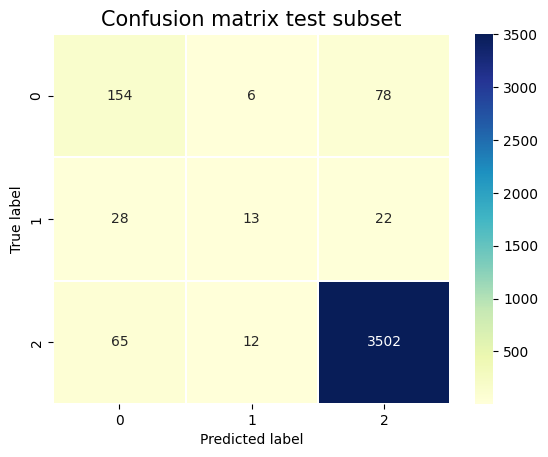

In [100]:
"""**Evaluando el modelo**"""
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

class_labels = ['0', '1', '2']

# model = list_models[counter_CV]
predictions = model.predict(X_test)
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(max_test, max_predictions)
sns.heatmap(conf_matrix, xticklabels=class_labels, yticklabels=class_labels, annot=True, linewidths=0.1, fmt='d',
            cmap='YlGnBu')
plt.title("Confusion matrix test subset", fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# plt.savefig(PATH_CARPETA_RAIZ + 'ConfusionMatrix' + str(counter_CV) + '_plot.png')
# plt.close()
counter_CV = counter_CV + 1
pass

In [131]:
ventanas_validacion = pd.read_parquet('ventanas_validacion.parquet')
ventanas_test = pd.read_parquet('ventanas_test.parquet')
ventanas_train = pd.read_parquet('ventanas_train.parquet')

In [34]:
import pandas as pd
df_metricas_64 = pd.read_csv('AjusteHiperparametros/64_neuronas/metricas_modelos.csv')
df_metricas_128 = pd.read_csv('AjusteHiperparametros/128_neuronas/metricas_modelos.csv')
df_metricas_256 = pd.read_csv('AjusteHiperparametros/256_neuronas/metricas_modelos.csv')


In [40]:
df_metricas_64['trues'] = (df_metricas_64['true0_pred0_tes'] + df_metricas_64['true1_pred1_tes'] + df_metricas_64['true2_pred2_tes']) / 3
df_metricas_128['trues'] = (df_metricas_128['true0_pred0_tes'] + df_metricas_128['true1_pred1_tes'] + df_metricas_128['true2_pred2_tes']) / 3
df_metricas_256['trues'] = (df_metricas_256['true0_pred0_tes'] + df_metricas_256['true1_pred1_tes'] + df_metricas_256['true2_pred2_tes']) / 3


In [42]:
import plotly.express as px
from plotly.offline import plot
import matplotlib.pyplot as plt

fig1 = px.line(df_metricas_64, x='overlap', y='trues', color='win_size',title='64 neuronas') #['true0_pred0_tes', 'trues', 'true1_pred1_tes', 'true2_pred2_tes']
plot(fig1)
# fig2 = px.line(df_metricas_128, x='overlap', y='trues', color='win_size',title='128 neuronas') #['true0_pred0_tes', 'trues', 'true1_pred1_tes', 'true2_pred2_tes']
# plot(fig2)
# fig4 = px.line(df_metricas_256, x='overlap', y='trues', color='win_size',title='256 neuronas') #['true0_pred0_tes', 'trues', 'true1_pred1_tes', 'true2_pred2_tes']
# plot(fig4)


'temp-plot.html'

In [33]:
df_metricas_256

;win_size;overlap;nº_evt_tr;nº_evt_val;nº_evt_te;nº_evt_tot;nº_evtcerca_tr;nº_evtcerca_val;nº_evtcerca_te;nº_evtcerca_tot;nº_NOevt_tr;nº_NOevt_val;nº_NOevt_te;nº_NOevt_tot;train_accuracy;validation_accuracy;test_accuracy;loss_train;loss_val;loss_test;true0_pred0_tr;true0_pred1_tr;true0_pred2_tr;true1_pred0_tr;true1_pred1_tr;true1_pred2_tr;true2_pred0_tr;true2_pred1_tr;true2_pred2_tr;true0_pred0_val;true0_pred1_val;true0_pred2_val;true1_pred0_val;true1_pred1_val;true1_pred2_val;true2_pred0_val;true2_pred1_val;true2_pred2_val;true0_pred0_tes;true0_pred1_tes;true0_pred2_tes;true1_pred0_tes;true1_pred1_tes;true1_pred2_tes;true2_pred0_tes;true2_pred1_tes;true2_pred2_tes
0   30;15;10;4877;902;853;6632;1922;338;372;2632;5...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
1   31;15;15;2359;532;427;3318;902;229;187;1318;26...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
2   32;15;20;1571;345;286;2202;622;148;120;890;172...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
3   33;15;25;1645;287;286;2218;628;123;120;871;174...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
4   34;15;30;1182;255;212;1649;467;115;94;676;1282...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     